# ロジスティック回帰

### データ　の用意

In [144]:
# 使用するライブラリーをインポート
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns #バイオリン図で必要になる（seaborn ライブラリーの violinplot メソッド）
from sklearn.datasets import load_iris

In [297]:
# アイリスデータを抽出
iris_dataset = load_iris()
# .data 部分を抽出し、カラム名も指定する。
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
# .target 部分を抽出し、カラム名も指定する。
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
# .concatを使用してXとyを列方向で結合する。
df = pd.concat([X, y], axis=1)

In [312]:
# .queryで行抽出、locで列抽出する。
df_selected = df.query("Species == [0, 1]").loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width", "Species"]]
df_selected

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


## 【問題1】仮定関数 # h(x) = 1/(1 + e**(-θ.T・ x))
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。  
ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます

In [567]:
theta = np.random.randn(5)
theta.shape[0]

5

In [454]:
theta.shape

(1, 5)

In [709]:
X_np = np.array(df_selected.iloc[:, :4])
X_np.shape

(100, 4)

In [494]:
X_np = np.concatenate([np.ones([X_np.shape[0], 1]), X_np], axis=1)
X_np.shape

(100, 5)

In [710]:
y_np = np.array(df_selected.Species)
y_np = y_np.reshape(100,1)
y_np.shape

(100, 1)

In [496]:
hypo_theta = np.dot(X_np, theta.reshape(5, 1))
hypo_theta.shape

(100, 1)

In [497]:
hypo_theta.shape

(100, 1)

In [498]:
hypo_y = 1/ (1 + np.exp( -hypo_theta ))

In [505]:
hypo_y.shape

(100, 1)

In [502]:
def _hypo_log(self, X):  # h(x) = 1/(1 + e**(-θ.T・ x))
    
    # θ.T・ x
    hypo_theta = np.dot(X_np, self.theta.reshape(5, 1))
    
    # h(x) = 1/(1 + e**(-θ.T・ x))
    hypo_y = 1/ (1 + np.exp( -hypo_theta ))
    
    return hypo_y

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください

In [446]:
y_np.shape

(100, 1)

In [447]:
X_np.shape

(100, 5)

## 左部分だけ作る 1/m Σ (h(x) - y)x

In [448]:
#(hypo_y - y_np)*X_np

In [455]:
((hypo_y - y_np)*X_np).sum(axis = 0)

array([ 29.3119312 , 128.0869851 , 114.6341854 , -13.09836685,
       -14.06412246])

In [456]:
m = y_np.shape[0]
left_part = ((hypo_y - y_np)*X_np).sum(axis = 0)/m
left_part

array([ 0.29311931,  1.28086985,  1.14634185, -0.13098367, -0.14064122])

## 右部分だけ作る λθ/m  j>=1

In [467]:
lamuda = 4
lamuda*theta

array([  4.13599924,   6.92419446,  -1.59118241, -12.1036921 ,
        -6.38251458])

In [468]:
right_part = lamuda*theta/m
right_part

array([ 0.04135999,  0.06924194, -0.01591182, -0.12103692, -0.06382515])

In [460]:
J_hypo = left_part + right_part

## 　λθ/m     j=0 の時のθ

In [471]:
#　λθ/m  j　= 0    の時のθ
theta_copy = theta.copy()
theta_copy[0] = 0
theta_copy

array([ 0.        ,  1.73104861, -0.3977956 , -3.02592302, -1.59562865])

In [500]:
theta_copy

array([ 0.        ,  1.73104861, -0.3977956 , -3.02592302, -1.59562865])

In [501]:
def _gradient_descent(self, X, y, lamuda = 4):
    
    #1/m Σ (h(x) - y)x : j = 0
    #1/m Σ (h(x) - y)x + λθ/m  : j>=1
    
    m = y.shape[0]                                   #number of sumple
    alpha = self.lr                                      # learning rate
    theta_copy = self.theta.copy()
    theta_copy[0] = 0                            #theta when j =  0
    hypo_y = self._hypo_log( X)           # predicted y
    
    #1/m Σ (h(x) - y)x
    left_part = ((hypo_y - y)*X).sum(axis = 0)/m
    
    #λθ/m 
    right_part = lamuda*theta_copy/m
    
    #1/m Σ (h(x) - y)x + λθ/m
    grad = left_part + right_part
    
    #θ　:=θ　 -　αΔθ　
    self.theta = self.theta - alpha*grad
    
    return self.theta

## 【問題3】推定  
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります

In [503]:
def predict(self, X):
    
        # return predicted y from X array
        
        #  get hypo_y from function
        hypo_y = self._hypo_log( X)
        
        # boundary is 0.5, return only 1 or 0
        # hypo_y is probablity of 1
        predict_y = np.where(hypo_y < 0.5,  0, 1)
        
        return predict_y

In [93]:
def predict_proba(self, X):

        # return probablity of 1 
        
        hypo_y = self._hypo_log( X)
        
        return hypo_y

## 【問題4】目的関数
## 1/m Σ{-y log(hx) - (1 - y)log(1 - hx)} +  λΣθ**2/2m
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
なお、この数式には正則化項が含まれています。

##  ひだり  -y log(hx)

In [508]:
log_hypo = np.log(hypo_y)

In [509]:
cost_left = -y_np*log_hypo

## 中  (1 - y)log(1 - hx)

In [510]:
hypo_log_1 = np.log(1 - hypo_y)

In [511]:
cost_middle =  (1 - y_np)*hypo_log_1

## 左と中を引く
## 1/m Σ{-y log(hx) - (1 - y)log(1 - hx)} 

In [356]:
cost_left_middle = (cost_left - cost_middle).sum()/m

## 右　λΣθ**2/2m

In [476]:
theta_squre = theta**2

In [477]:
theta_squre.sum()

15.926167174198415

In [478]:
lamuda_2m = lamuda/(2*m)
lamuda_2m

0.02

In [479]:
cost_right = lamuda_2m*(theta_squre.sum())
cost_right

0.3185233434839683

## cost_function
## 1/m Σ{-y log(hx) - (1 - y)log(1 - hx)} +  λΣθ**2/2m

In [361]:
cost_j = cost_left_middle + cost_right
cost_j

0.7389181001791962

In [513]:
def _cost_function(self, X, y, lamuda = 4):
    
    #1/m Σ{-y log(hx) - (1 - y)log(1 - hx)} +  λΣθ**2/2m
    
    #get probablity  of 0 matrix
    hypo_y = self._hypo_log( X)
    
    #-y log(hx) 
    log_hypo = np.log(hypo_y)                                #log(hx) 
    cost_left = -y*log_hypo
    
    #(1 - y)log(1 - hx)
    hypo_log_1 = np.log(1 - hypo_y)                      #log(1 - hx)
    cost_middle =  (1 - y)*hypo_log_1
    
    #1/m Σ{-y log(hx) - (1 - y)log(1 - hx)}
    cost_left_middle = (cost_left -cost_middle).sum()/m
    
    #λΣθ**2/2m
    theta_squre = self.theta**2
    theta_squre.sum()                                                #  Σθ**2
    lamuda_2m = lamuda/(2*m)                               #λ/2m
    cost_right = lamuda_2m*(theta_squre.sum())
    
    #1/m Σ{-y log(hx) - (1 - y)log(1 - hx)} +  λΣθ**2/2m
    cost_j = cost_left_middle + cost_right
    
    return cost_j

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginica  
2値分類に対してスクラッチ実装の学習と推定を行なってください。  
scikit-learnによる実装と比べ、正しく動いているかを確認してください  
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください

## sklearn による学習推定

In [781]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_np,y_np)
y_pred = clf.predict(X_np)

accuracy_score(y_np, y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.99

## スクラッチロジスティック回帰

In [814]:
class ScratchLogisticRegression():

    def __init__(self, num_iter = 50, lr = 0.1, bias = None, verbose = None , lamuda = 4):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        #lamuda 
        self.lamuda = lamuda
        
    def fit(self, X, y, X_val=None, y_val=None):
        
        # if bias is None, shape of theta is 5
        # if bias is True, shape of theta is 4
        if not self.bias:
            self.theta = np.random.randn(X.shape[1] + 1)
        else:
            self.theta = np.random.randn(X.shape[1])
        
        # if bias is None, columns of X is 5
        if not self.bias:
            X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)
            
        for i in range(self.iter):
            self._gradient_descent(X, y)                #  　降下勾配方でthetaを更新
            cost = self._cost_function(X, y)          #  　損失の導出
        
            if self.verbose:
                self.loss[i] = cost                                #損失arrayを書き換え
#                 print("{}回目の学習".format(self.iter))

        return self.loss

    def _hypo_log(self, X):
        
        # h(x) = 1/(1 + e**(-θ.T・ x))

        # θ.T・ x
        hypo_theta = np.dot(X, self.theta.reshape(self.theta.shape[0], 1))

        # h(x) = 1/(1 + e**(-θ.T・ x))
        hypo_y = 1/ (1 + np.exp( -hypo_theta ))

        return hypo_y

    def _gradient_descent(self, X, y):

        #1/m Σ (h(x) - y)x : j = 0
        #1/m Σ (h(x) - y)x + λθ/m  : j>=1
        
        #difine valuable
        m = y.shape[0]                                   #number of sumple
        alpha = self.lr                                      # learning rate
        theta_copy = self.theta.copy()
        theta_copy[0] = 0                            #theta when j =  0
        hypo_y = self._hypo_log( X)           # predicted y

        #1/m Σ (h(x) - y)x
        left_part = ((hypo_y - y)*X).sum(axis = 0)/m

        #λθ/m 
        right_part = self.lamuda*theta_copy/m

        #1/m Σ (h(x) - y)x + λθ/m
        grad = left_part + right_part

        #θ　:=θ　 -　αΔθ　
        self.theta = self.theta - alpha*grad


        return self.theta
    
    def _cost_function(self, X, y, lamuda = 4):

        #1/m Σ{-y log(hx) - (1 - y)log(1 - hx)} +  λΣθ**2/2m
        
        theta_copy = self.theta.copy()
        theta_copy[0] = 0                                            #theta when j =  0

        #get probablity  of 0 matrix
        hypo_y = self._hypo_log( X)

        #-y log(hx) 
        log_hypo = np.log(hypo_y)                                #log(hx) 
        cost_left = -y*log_hypo

        #(1 - y)log(1 - hx)
        hypo_log_1 = np.log(1 - hypo_y)                      #log(1 - hx)
        cost_middle =  (1 - y)*hypo_log_1

        #1/m Σ{-y log(hx) - (1 - y)log(1 - hx)}
        cost_left_middle = (cost_left -cost_middle).sum()/m

        #λΣθ**2/2m
        theta_squre = theta_copy**2
        theta_squre.sum()                                                      #  Σθ**2
        lamuda_2m = self.lamuda/(2*m)                               #λ/2m
        cost_right = lamuda_2m*(theta_squre.sum())

        #1/m Σ{-y log(hx) - (1 - y)log(1 - hx)} +  λΣθ**2/2m
        cost_j = cost_left_middle + cost_right

        return cost_j

    def predict(self, X):

        # return predicted y from X array
        
        if not self.bias:
            X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)

        #  get hypo_y from function
        hypo_y = self._hypo_log( X)

        # boundary is 0.5, return only 0 or 1
        predict_y = np.where(hypo_y < 0.5,  0, 1)

        return predict_y

    def predict_proba(self, X):

        # return probablity of 1 
        
        if not self.bias:
            X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)
            
        hypo_y = self._hypo_log( X)

        return hypo_y

In [807]:
X_np =  X_np[:, :2]

In [808]:
X_np.shape

(100, 2)

In [809]:
y_np.shape

(100, 1)

In [815]:
slf = ScratchLogisticRegression(num_iter = 500, lr = 0.001, lamuda = 0.5, verbose = True)

loss =  slf.fit(X_np,y_np)

y_pred = slf.predict(X_np)

accuracy_score(y_np, y_pred)

0.87

## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

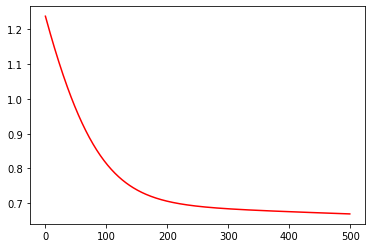

In [816]:
slf = ScratchLogisticRegression(num_iter = 500, lr = 0.001, lamuda = 0.5, verbose = True)
loss =  slf.fit(X_np,y_np)

y = loss
X = np.arange(len(loss))

plt.plot(X, y, color = 'r')
plt.show()

## 【問題7】決定領域の可視化
決定領域を可視化してください 

In [817]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    y = y.ravel()# 追加
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [820]:
slf = ScratchLogisticRegression(num_iter = 500, lr = 0.001, lamuda = 0.5, verbose = True)
loss =  slf.fit(X_np,y_np)

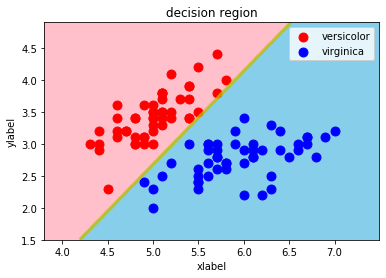

In [821]:
decision_region(X_np, y_np, slf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])